<a href="https://colab.research.google.com/github/M-Amulya/Electric_Vehicle_Market_segmentation_analysis/blob/main/Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**EV-Behavioural data**

Analysing the Behavioural data to understand the customer behaviour who buys electric velicles and identify our targeted customers.

In [ ]:
#load the data
import pandas as pd
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EV_market_segmentation/Behavioural_dataset.csv')

In [ ]:
#check top 5 rows of our dataset
df2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [ ]:
#check shape
df2.shape

(99, 8)

In [ ]:
#check basic statistics
df2.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [ ]:
#check basic info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [ ]:
#rename the colunm 'Personal loan' to 'Car_loan'
df2.rename(columns={'Personal loan': 'Car_loan'}, inplace=True)

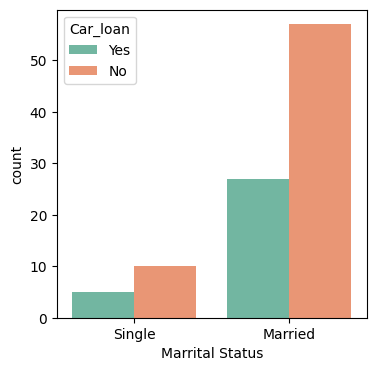

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,4))
# Plotting the Car loan status with respect to Marrital Status
sns.countplot(x ='Marrital Status', hue = 'Car_loan',  data = df2, palette = 'Set2')
plt.show()

In [ ]:
(df2['Marrital Status'].value_counts()['Married'])/((df2['Marrital Status'].value_counts()['Married'])+(df2['Marrital Status'].value_counts()['Single']))*100

84.84848484848484

In [ ]:
(df2['Marrital Status'].value_counts()['Single'])/((df2['Marrital Status'].value_counts()['Married'])+(df2['Marrital Status'].value_counts()['Single']))*100


15.151515151515152

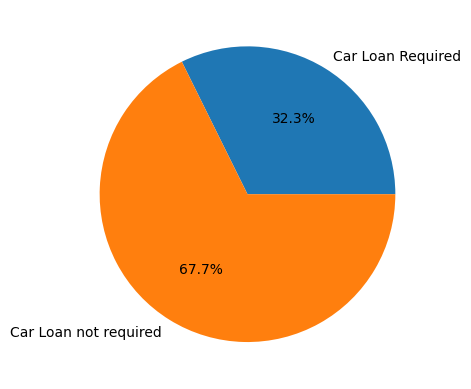

In [ ]:
#Getting labels and data
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [df2.query('Car_loan == "Yes"').Car_loan.count(),df2.query('Car_loan == "No"').Car_loan.count()]

# plotting data on chart
plt.pie(Loan_status, labels=labels, autopct='%1.1f%%')
plt.show()

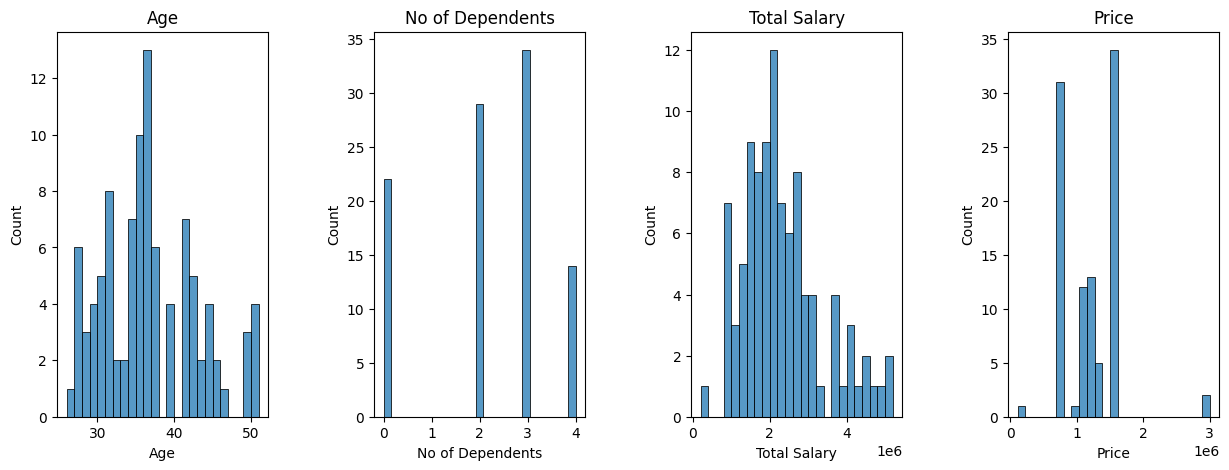

In [ ]:
# Plotting the count of each entry for consumer features - Age, No. 0f Dependents, Total Salary, Price
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df2[x], bins= 25)
  plt.title(f'{x}')
plt.show()

In [ ]:
!pip install kmodes
from kmodes.kprototypes import KPrototypes

# Kmodes is similar to K means clustering when computing distance for continuous data using mean but for categorical data it uses the mode
# Frequency based dissimilarity measure
# Hence it is more preferrable for clustering multiple datatypes

In [ ]:
df2.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [ ]:
cluster_features = list(df2.columns)
cluster_data = df2[cluster_features].values

In [ ]:
#converting int to float
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

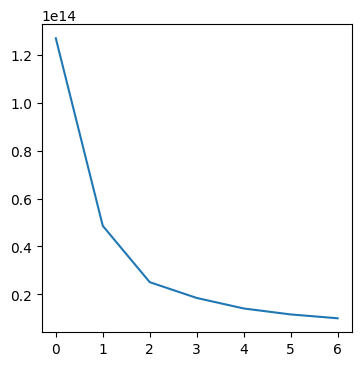

In [ ]:
# Finding optimal number of clusters for KPrototypes

cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.figure(figsize=(4,4))
plt.plot(cost)

In [ ]:
cost

[126979657487180.34,
 48616816198579.65,
 25087753148183.234,
 18491809410726.285,
 14099253855131.873,
 11606346846292.736,
 10002688967750.752]

In [ ]:
# fitting data to clusters

kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 3, ncost: 49650723166357.79
Run: 1, iteration: 2/20, moves: 4, ncost: 48777842651066.98
Run: 1, iteration: 3/20, moves: 0, ncost: 48777842651066.98
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 2, ncost: 48631729380526.18
Run: 2, iteration: 2/20, moves: 0, ncost: 48631729380526.18
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 10, ncost: 49683693790529.695
Run: 3, iteration: 2/20, moves: 4, ncost: 48826127784986.055
Run: 3, iteration: 3/20, moves: 2, ncost: 48631729380526.18
Run: 3, iteration: 4/20, moves: 0, ncost: 48631729380526.18
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/20, moves: 22, ncost: 59042898563188.15


In [ ]:
# Appending the cluster data

df2['Cluster'] = clusters

In [ ]:
# Average cost of the EV
df2.Price.mean()

1194040.4040404041

In [ ]:
# Average cost of a car in segment 1
df2.Price[df2.Cluster==0].mean()

1632142.857142857

In [ ]:
df2['Price'][df2.Cluster==1].max()

1600000

In [ ]:
# Average cost of a car in segment 1
df2.Price[df2.Cluster==1].mean()

1021267.6056338028

In [ ]:
df2['Cluster'].value_counts(normalize=True) * 100

1    71.717172
0    28.282828
Name: Cluster, dtype: float64

In [ ]:
# Segregrating each cluster
Cluster_0 = df2[df2.Cluster==0]
Cluster_1 = df2[df2.Cluster==1]

In [ ]:
df2['Cluster'].value_counts()

1    71
0    28
Name: Cluster, dtype: int64

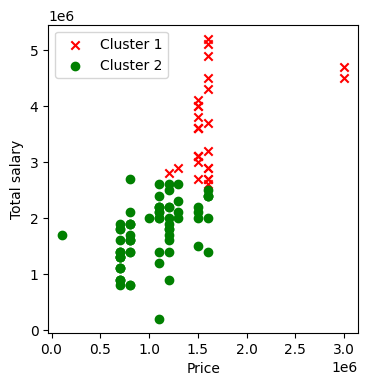

In [ ]:
# plotting the effct of salary and ev price on cluster data

plt.figure(figsize=(4,4))
plt.scatter(Cluster_0.Price, Cluster_0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.Price, Cluster_1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('Price')
plt.ylabel('Total salary')
plt.show()

# There is a clear difference in segments when comparing salary and the price of EV purchased

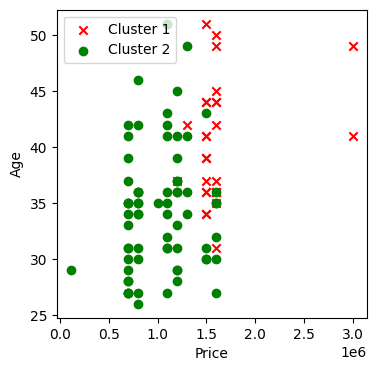

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(Cluster_0.Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('Price')
plt.ylabel('Age')
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

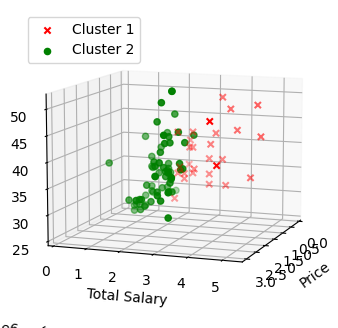

In [ ]:
# plotting influence of age

fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()


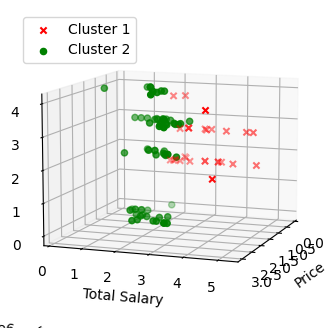

In [ ]:
# plotting influence of No of Dependents

fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.Price, Cluster_0['Total Salary'], Cluster_0['No of Dependents'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.Price, Cluster_1['Total Salary'],Cluster_1['No of Dependents'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')
ax.view_init(10,20)

plt.xlabel("Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()


In [ ]:
df2['No of Dependents'].value_counts()

3    34
2    29
0    22
4    14
Name: No of Dependents, dtype: int64

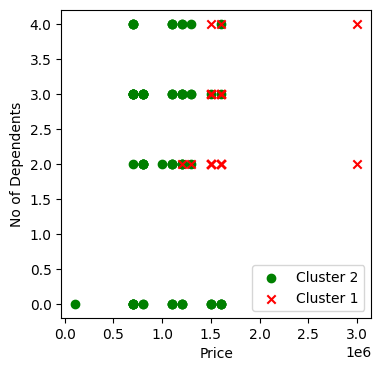

In [ ]:
# plotting the effect of no of dependents and ev price on cluster data
fig = plt.figure(figsize=(4,4))
plt.scatter(Cluster_1.Price, Cluster_1['No of Dependents'],color='green', label = 'Cluster 2')
plt.scatter(Cluster_0.Price, Cluster_0['No of Dependents'],color='red', marker = 'x', label = 'Cluster 1')
plt.legend(loc="lower right")

plt.xlabel('Price')
plt.ylabel('No of Dependents')
plt.show()

# there is a clear difference in segments when comparing no of dependencies and the price of EV purchased